# Мини-проект: Анализ поведения пользователей интернет сервиса. #

## Описание данных. ## 

<b>user_data</b>:

- client – идентификатор пользователя
- premium – является ли клиент премиум
- age – возраст

<b>logs</b>:

- client – идентификатор пользователя
- success – результат (успех - 1, нет - 0)
- platform – платформа
- time – время в формате Unix

### Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику. ###

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# считываем данные
user_data = pd.read_csv('user_data.csv')
logs = pd.read_csv('logs.csv')

In [3]:
# функция для получения общей информации о датасете
def description_func(data):
    display('Размер таблицы:', data.shape)
    print()
    display('Тип данных:', data.dtypes)
    print()
    display('Количество пропущенных значений:', data.isna().sum())
    print()
    display('Описательная статистика:', data.describe())
    

In [4]:
# используем функцию
description_func(user_data)

'Размер таблицы:'

(2954, 3)

'Тип данных:'

client     int64
premium     bool
age        int64
dtype: object

'Количество пропущенных значений:'

client     0
premium    0
age        0
dtype: int64

'Описательная статистика:'

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [5]:
# используем функцию 
description_func(logs)

'Размер таблицы:'

(4500, 4)

'Тип данных:'

client       int64
success       bool
platform    object
time         int64
dtype: object

'Количество пропущенных значений:'

client      0
success     0
platform    0
time        0
dtype: int64

'Описательная статистика:'

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


### Какой клиент совершил больше всего успешных операций? (success == True) ###

In [6]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [7]:
# фильтруем по успешным операциям, группируем по клиентам и подсчитываем число строк(например по платформам)
# сортируем по убыванию и переименовываем столбцы
success_number = logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'platform':'count'}) \
    .sort_values('platform', ascending=False) \
    .rename(columns={'platform':'success_number'})

In [8]:
success_number.head()

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41


In [9]:
# альтернативный вариант решения, без использования query
# с учетом того, что success имеет тип данных bool, можно посчитать сумму успешных операций (они будут равны True = 1)
success_number_2 = logs.groupby('client', as_index=False) \
    .agg({'success':'sum'}) \
    .sort_values('success', ascending=False) \
    .rename(columns={'success':'success_number'})

In [10]:
success_number_2.head()

,client,success_number
3300,82563,41
1426,36165,41
2095,52870,41
468,12179,41
2469,61473,41


In [11]:
# максимальное количество успешных операций
maximum_success = success_number['success_number'].max()
maximum_success_2 = success_number_2['success_number'].max()

In [12]:
# проверка совпадения максимумов 
maximum_success == maximum_success_2

True

In [13]:
# фильтруем по полученному максимуму операций,группируем по клиентам, выводим id клиентов и преобразуем в список
id_successful_clients = success_number.query('success_number == @maximum_success') \
            .sort_values('client') \
            .client \
            .tolist()

In [14]:
id_successful_clients_2 = success_number_2.query('success_number == @maximum_success_2') \
            .sort_values('client') \
            .client \
            .tolist()

In [15]:
# список id клиентов с наибольшим количеством успешных операций
id_successful_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [16]:
id_successful_clients_2

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [17]:
# проверка совпадения списков клиентов
id_successful_clients == id_successful_clients_2

True

In [18]:
# первый способ преобразования списка в строку
for client in id_successful_clients:
    print(client, end=', ')

12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584, 

In [19]:
# второй, более удачный способ
', '.join([str(client) for client in id_successful_clients])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

### С какой платформы осуществляется наибольшее количество успешных операций? ###

In [20]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [21]:
# 1 способ вычисления платформы с наибольшим количеством успешных операций
logs.query('success==True') \
    .groupby('platform', as_index=False) \
    .agg({'platform':'count'}) \
    .sort_values('platform', ascending=False)

,platform
1,2019
0,1090
2,180


In [22]:
# 2 способ 
logs.query('success == True')['platform'].value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

### Какую платформу предпочитают премиумные клиенты? ###

In [23]:
# мерджим таблицы по столбцу client
new_data = user_data.merge(logs, how='inner', on='client')
new_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [24]:
# полученную таблицу фильтруем по наличию премиума, затем подсчитываем платформы каждого типа
new_data.query('premium==True')['platform'].value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

### Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет) ###

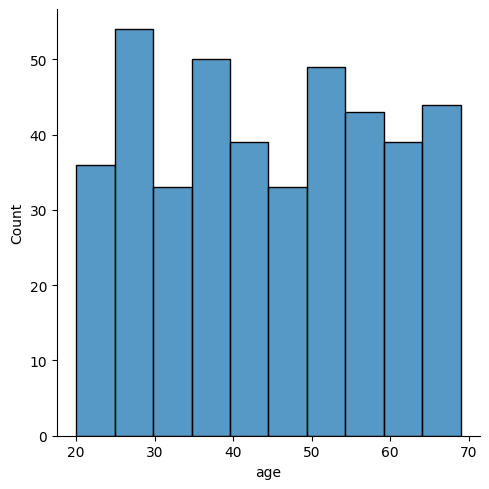

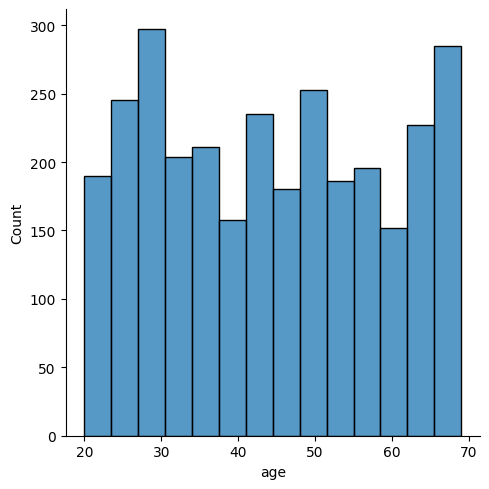

In [28]:
# строим гистограмму распределениям возраста клиентов по отфильтрованным данным (премиум и без премиума)
sns.displot(new_data.query('premium==True')['age'])
sns.displot(new_data.query('premium==False')['age'])

### Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий? ###

In [52]:
# фильтруем датасет по платформе - computer, затем для каждой возрастной категории подсчитываем количество успешных операций
computer_clients = new_data.query('platform == "computer"') \
                            .groupby('age', as_index=False) \
                            .agg({'success':'sum'})

<AxesSubplot: xlabel='age', ylabel='success'>

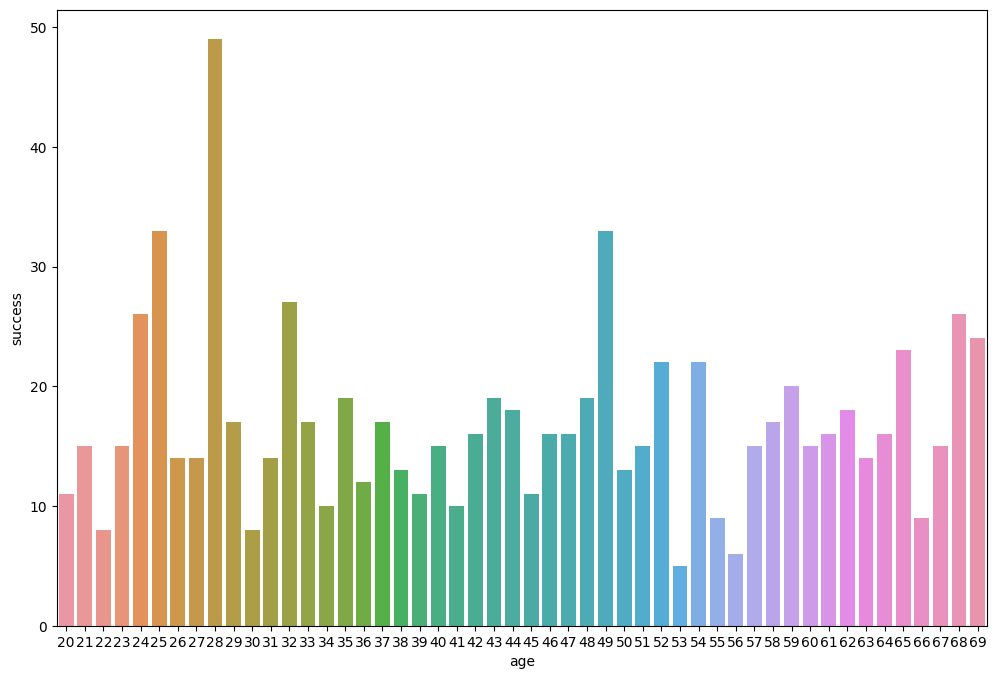

In [56]:
# задаем размер и затем строим гистограмму распределения успешных операций по возрасту
plt.figure(figsize=(12,8))
sns.barplot(x='age', y='success', data=computer_clients)